Lectura de la variable **Gastos financieros**, análisis y preprocesado


In [1]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.impute import KNNImputer
#from tabulate import tabulate


In [2]:
ruta="../../data/"
ficheroLectura=ruta+"gfinancieros.csv"
ficheroEscritura=ruta+"gfinancierosProcesado.csv"
patronColumnas="RAGXFI"

In [3]:
#Lectura del csv donde se encuentran los datos de la variable por años
#Se comprueba que no hay valores de ID de empresa duplicados


dfOriginal = pd.read_csv(ficheroLectura, decimal=',', dtype=float)
df = dfOriginal.filter(like=patronColumnas)
duplicados = dfOriginal['ID'].duplicated().any()
print(f"La columna ID tiene valores duplicados: {duplicados}")
print(f"Número de filas: {len(df)}")
print(df.head())


La columna ID tiene valores duplicados: False
Número de filas: 12266
     RAIE2010    RAIE2011    RAIE2012    RAIE2013    RAIE2014    RAIE2015  \
0  20586147.0  22171157.0  26714012.0  28888389.0  23711882.0  10895968.0   
1   6341128.0   7361314.0   6631251.0   5423863.0   5235643.0   6240988.0   
2   7662306.0   7744383.0   3947426.0     77767.0    127210.0    354629.0   
3  68433832.0  71936077.0  76572850.0  80115828.0  78118429.0  91964966.0   
4  51076159.0  56731628.0  48926979.0  48520530.0  48165576.0  55319283.0   

      RAIE2016     RAIE2017    RAIE2018     RAIE2019     RAIE2020  \
0    9070778.0   10634286.0   8776030.0   10686673.0    9881160.0   
1    6797898.0    6816970.0   8096488.0    8764069.0    7444058.0   
2    1061966.0    1074982.0   1184925.0    1151218.0    1495176.0   
3  106479177.0  100447696.0  99414744.0  107890568.0  107617850.0   
4   53208782.0   42851952.0  44081774.0   52242578.0   52710914.0   

      RAIE2021     RAIE2022  
0   12759270.0   168624

In [4]:
df.head(10)#muestro  las 10 primeras filas

,RAIE2010,RAIE2011,RAIE2012,RAIE2013,RAIE2014,RAIE2015,RAIE2016,RAIE2017,RAIE2018,RAIE2019,RAIE2020,RAIE2021,RAIE2022
0,20586147.0,22171157.0,26714012.0,28888389.0,23711882.0,10895968.0,9070778.0,10634286.0,8776030.0,10686673.0,9881160.0,12759270.0,16862448.0
1,6341128.0,7361314.0,6631251.0,5423863.0,5235643.0,6240988.0,6797898.0,6816970.0,8096488.0,8764069.0,7444058.0,11295742.0,13985114.0
2,7662306.0,7744383.0,3947426.0,77767.0,127210.0,354629.0,1061966.0,1074982.0,1184925.0,1151218.0,1495176.0,1530209.0,1758825.0
3,68433832.0,71936077.0,76572850.0,80115828.0,78118429.0,91964966.0,106479177.0,100447696.0,99414744.0,107890568.0,107617850.0,151706585.0,166463456.0
4,51076159.0,56731628.0,48926979.0,48520530.0,48165576.0,55319283.0,53208782.0,42851952.0,44081774.0,52242578.0,52710914.0,69281628.0,90651116.0
5,433386.0,113851.0,228552.0,261513.0,1025151.0,735134.0,398815.0,869737.0,721899.0,6835633.0,757458.0,786790.0,923074.0
6,1046708.0,1093966.0,1146242.0,1357596.0,1391526.0,1399767.0,1397746.0,2149013.0,2126419.0,1991890.0,1926287.0,1884800.0,1932587.0
7,193683192.0,222229375.0,217001065.0,294341013.0,300257532.0,356000362.0,289664670.0,328482584.0,347646144.0,385708828.0,361216111.0,546009073.0,665225893.0
8,986989.0,677262.0,695114.0,507922.0,804881.0,20712.0,1001871.0,682145.0,1181805.0,190104.0,98180.0,210724.0,32349.0
9,26246030.0,27164353.0,28680310.0,26975884.0,24628651.0,28040422.0,32922518.0,32623938.0,35555973.0,36594528.0,38639080.0,55958995.0,58424267.0


In [5]:
# Contar valores nulos por columna
# Consideramos tanto los NaN como los 0 como valores faltantes para este cálculo

df.replace(0, np.nan, inplace=True)
porcentajeFaltantes = (df.isnull()).mean() * 100
print( "Porcentaje de datos faltantes por año:")
print(porcentajeFaltantes)





Porcentaje de datos faltantes por año:
RAIE2010    26.039459
RAIE2011    22.118050
RAIE2012    19.289092
RAIE2013    13.900212
RAIE2014     9.946193
RAIE2015     7.687918
RAIE2016     4.451329
RAIE2017     0.317952
RAIE2018     0.171205
RAIE2019     0.008153
RAIE2020     6.701451
RAIE2021     4.214903
RAIE2022     7.288440
dtype: float64


<ipython-input-5-f2345fe28886>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(0, np.nan, inplace=True)


**Cálculo de outliers**

In [6]:
# Calcula el IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
limiteInferior = Q1 - 10 * IQR
limiteSuperior = Q3 + 10 * IQR

# Imprime los umbrales
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    print(f"Umbrales para {col}: Límite Inferior = {limiteInferior[col]}, Límite Superior = {limiteSuperior[col]}")

# Considerar como outlier aquellos valores que están fuera del rango de Q1 - 10*IQR y Q3 + 10*IQR
print("Numero de outliers por año")
outliers = ((df < (limiteInferior)) | (df > (limiteSuperior))).sum()


# Mostrar los outliers
print(outliers)

Umbrales para RAIE2010: Límite Inferior = -148925772.5, Límite Superior = 169910953.75
Umbrales para RAIE2011: Límite Inferior = -171309846.0, Límite Superior = 195013713.0
Umbrales para RAIE2012: Límite Inferior = -179249052.44224998, Límite Superior = 204245072.4475
Umbrales para RAIE2013: Límite Inferior = -184851801.0, Límite Superior = 210517425.0
Umbrales para RAIE2014: Límite Inferior = -201575056.17274997, Límite Superior = 229225113.42774996
Umbrales para RAIE2015: Límite Inferior = -220250001.5, Límite Superior = 250879118.5
Umbrales para RAIE2016: Límite Inferior = -226800301.25, Límite Superior = 258948761.5
Umbrales para RAIE2017: Límite Inferior = -231877638.0, Límite Superior = 264265044.0
Umbrales para RAIE2018: Límite Inferior = -252564219.0, Límite Superior = 287093277.0
Umbrales para RAIE2019: Límite Inferior = -282244587.0, Límite Superior = 319373325.0
Umbrales para RAIE2020: Límite Inferior = -279468393.75, Límite Superior = 314650701.75
Umbrales para RAIE2021: Lí

In [7]:
# Agrupar las filas por porcentaje de  valores  nan
nanRow = df.apply(lambda row: pd.isna(row).sum(), axis=1).value_counts().sort_index()

# Mostrar el resultado
print(nanRow)

0     7500
1     1428
2      820
3      728
4      578
5      470
6      357
7      229
8      106
9       31
10      16
11       1
12       2
dtype: int64


In [8]:
# Eliminar los valores  considerados outliers

df = df.where((df >= limiteInferior) & (df <= limiteSuperior), np.nan)


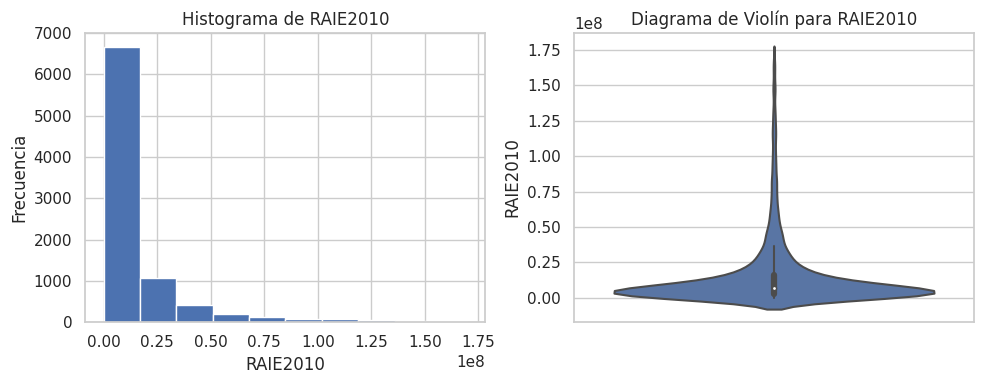

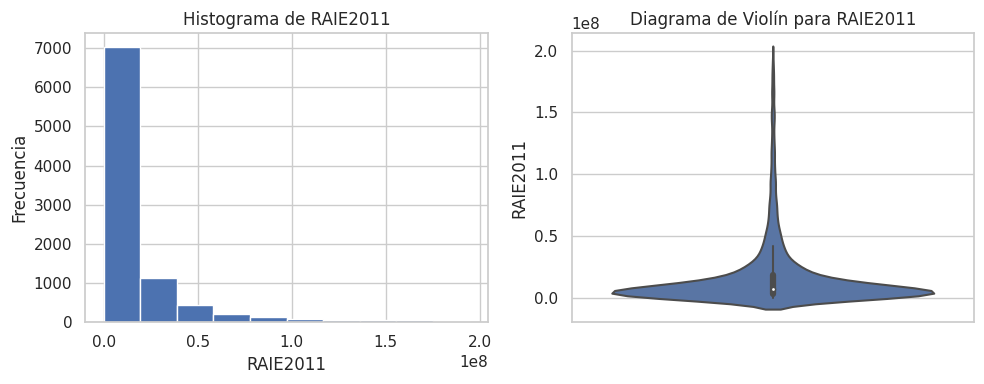

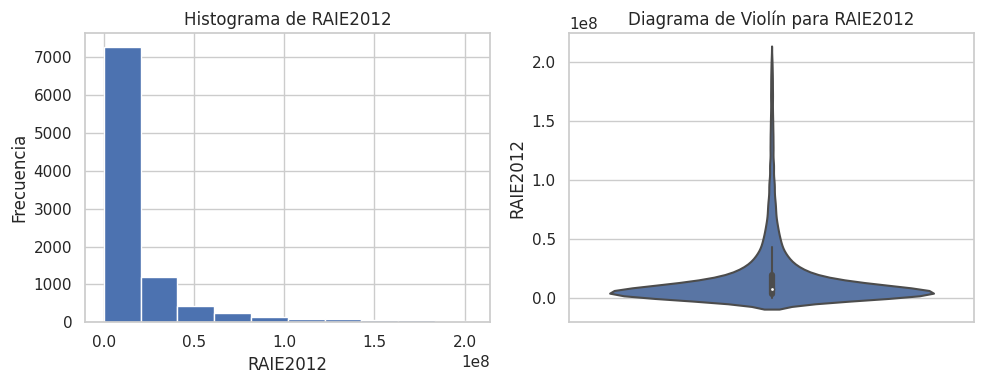

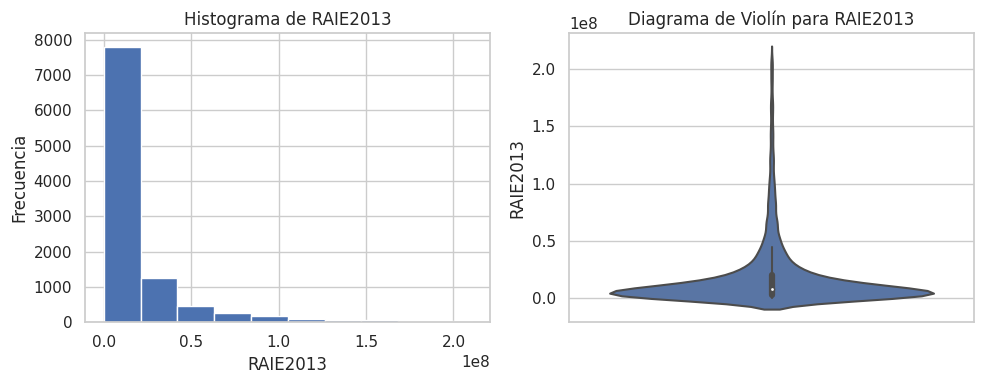

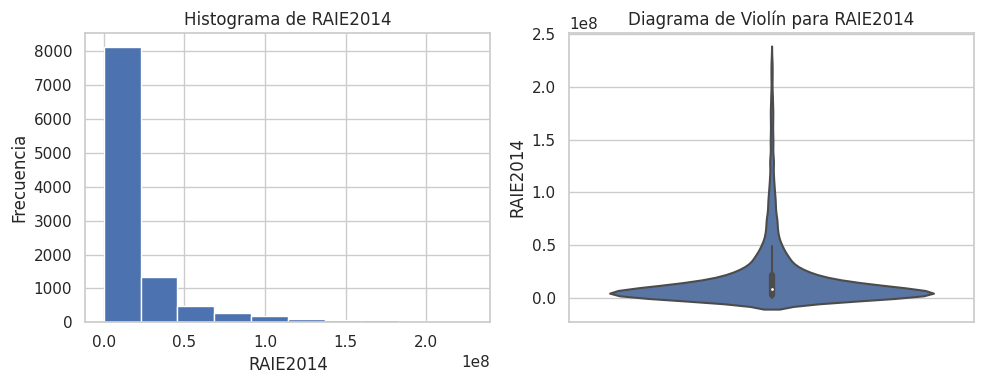

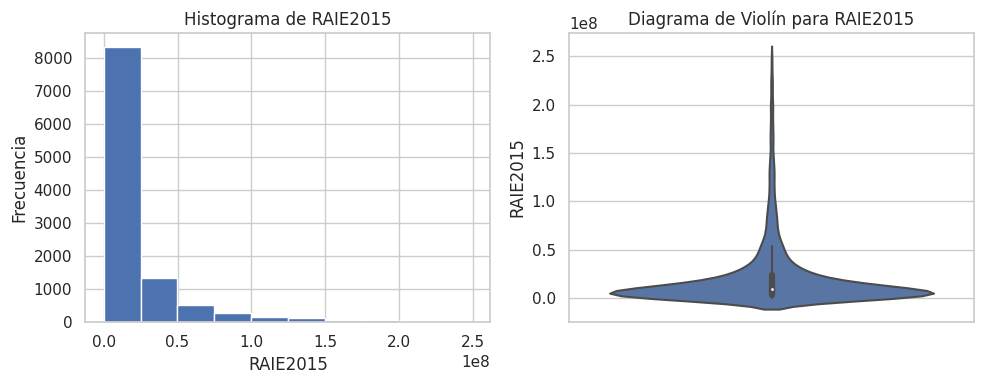

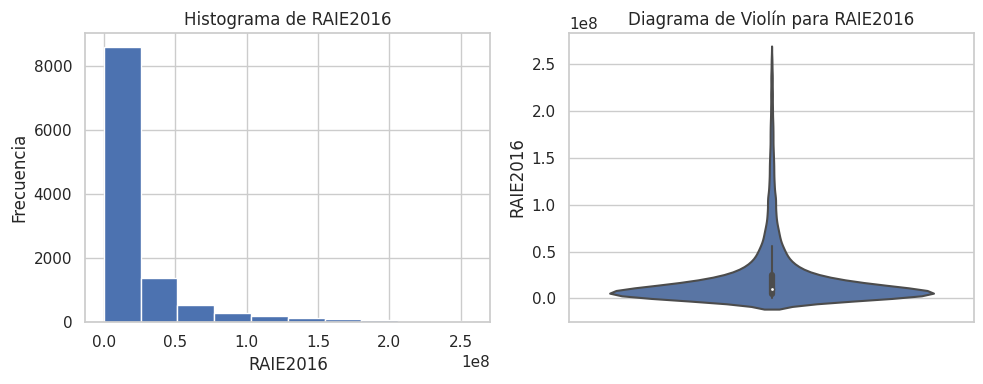

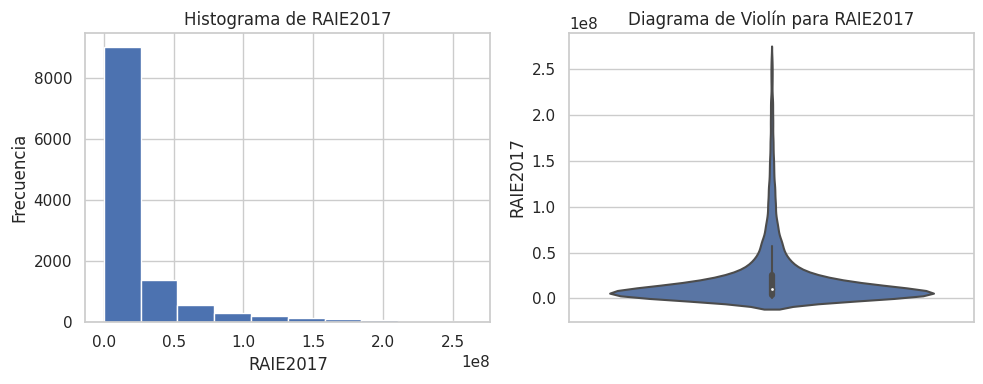

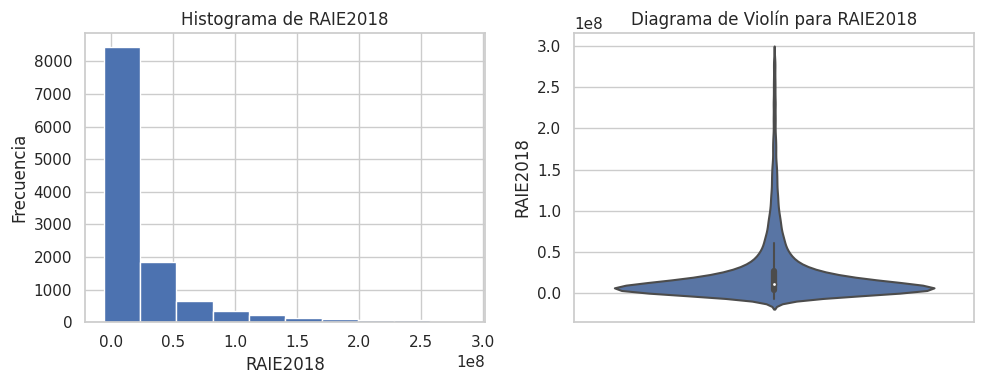

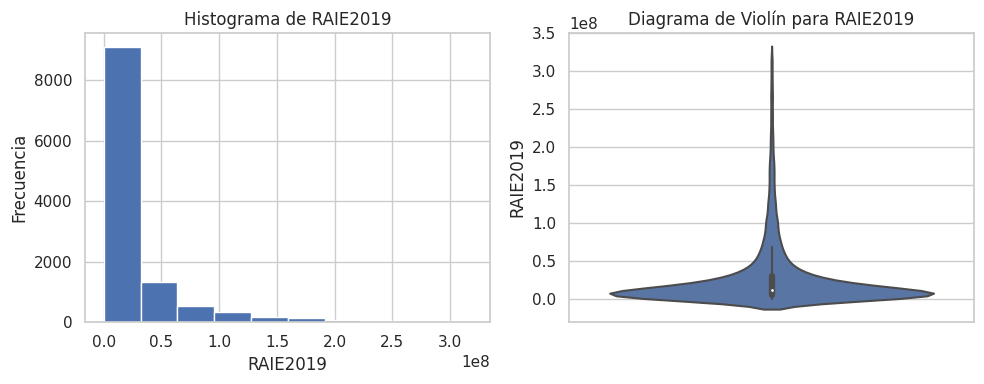

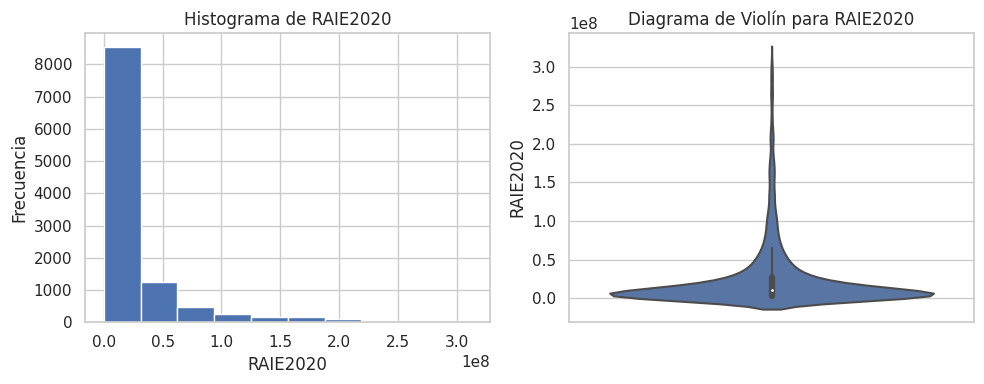

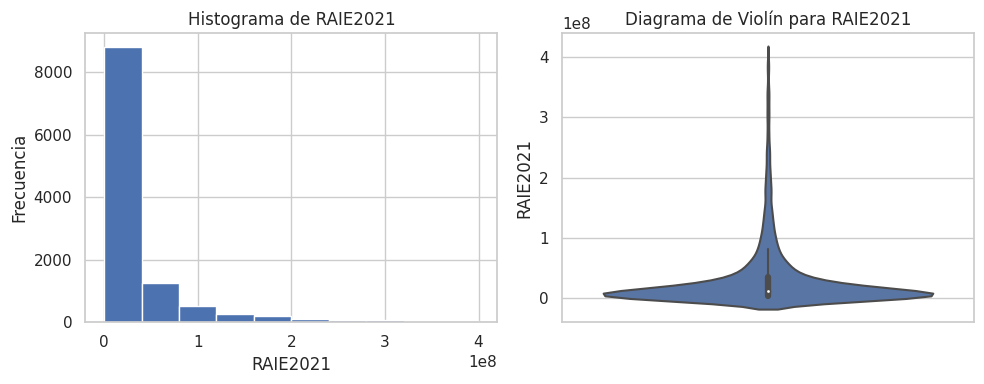

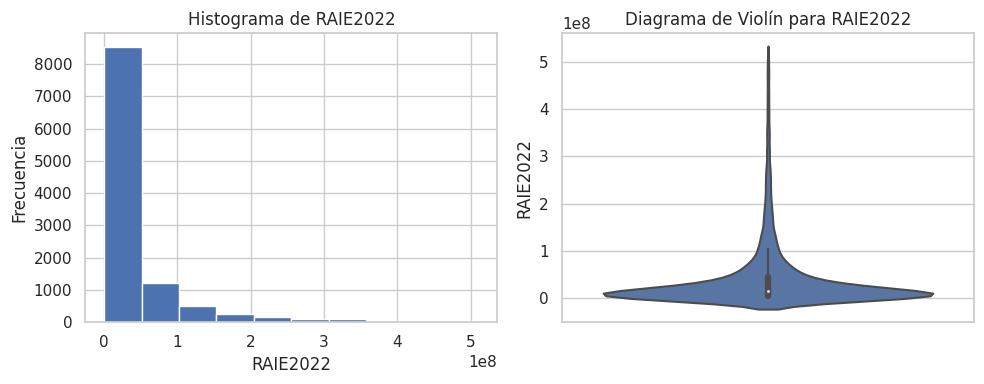

In [9]:
sns.set(style="whitegrid")

# Generar histogramas y diagramas de violín para cada columna
for columna in df.select_dtypes(include=['float64', 'int64']).columns:
    # Histograma
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
    df[columna].hist()
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

    # Diagrama de violín
    plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
    sns.violinplot(data=df, y=columna)
    plt.title(f'Diagrama de Violín para {columna}')

    plt.tight_layout()
    plt.show()

In [10]:
# Agrupar las filas por numero de nan despues de haber marcado los outliers
nanRow = df.apply(lambda row: pd.isna(row).sum(), axis=1).value_counts().sort_index()

# Mostrar el resultado
print("Agrupación de las filas según el número de nan que tengan (de 0 a 13)")
print(nanRow)




Agrupación de las filas según el número de nan que tengan (de 0 a 13)
0     7079
1     1411
2      835
3      738
4      601
5      471
6      384
7      254
8      135
9       63
10      46
11      31
12      37
13     181
dtype: int64


**Imputación de valores nulos**


Se usará una interpolación por filas. Después de esta operación quedarán aún valores nan  en el caso de que no existan valores no nulos en los extremos de cada fila. Esos valores se imputarán  con la media de la fila. Para las filas que tengan todos su valores nulos, se les imputará lotro valor en el notebook de integración de datos.

In [11]:
df.head(20)

,RAIE2010,RAIE2011,RAIE2012,RAIE2013,RAIE2014,RAIE2015,RAIE2016,RAIE2017,RAIE2018,RAIE2019,RAIE2020,RAIE2021,RAIE2022
0,20586147.00,22171157.0,26714012.0,28888389.0,23711882.0,10895968.0,9070778.0,10634286.0,8776030.0,10686673.0,9881160.0,1.275927e+07,16862448.0
1,6341128.00,7361314.0,6631251.0,5423863.0,5235643.0,6240988.0,6797898.0,6816970.0,8096488.0,8764069.0,7444058.0,1.129574e+07,13985114.0
2,7662306.00,7744383.0,3947426.0,77767.0,127210.0,354629.0,1061966.0,1074982.0,1184925.0,1151218.0,1495176.0,1.530209e+06,1758825.0
3,68433832.00,71936077.0,76572850.0,80115828.0,78118429.0,91964966.0,106479177.0,100447696.0,99414744.0,107890568.0,107617850.0,1.517066e+08,166463456.0
4,51076159.00,56731628.0,48926979.0,48520530.0,48165576.0,55319283.0,53208782.0,42851952.0,44081774.0,52242578.0,52710914.0,6.928163e+07,90651116.0
5,433386.00,113851.0,228552.0,261513.0,1025151.0,735134.0,398815.0,869737.0,721899.0,6835633.0,757458.0,7.867900e+05,923074.0
6,1046708.00,1093966.0,1146242.0,1357596.0,1391526.0,1399767.0,1397746.0,2149013.0,2126419.0,1991890.0,1926287.0,1.884800e+06,1932587.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,986989.00,677262.0,695114.0,507922.0,804881.0,20712.0,1001871.0,682145.0,1181805.0,190104.0,98180.0,2.107240e+05,32349.0
9,26246030.00,27164353.0,28680310.0,26975884.0,24628651.0,28040422.0,32922518.0,32623938.0,35555973.0,36594528.0,38639080.0,5.595900e+07,58424267.0


In [12]:
df = df.interpolate(method='linear', axis=1, inplace=False)
df.head(20)

,RAIE2010,RAIE2011,RAIE2012,RAIE2013,RAIE2014,RAIE2015,RAIE2016,RAIE2017,RAIE2018,RAIE2019,RAIE2020,RAIE2021,RAIE2022
0,20586147.00,22171157.0,26714012.0,28888389.0,23711882.0,10895968.0,9070778.0,10634286.0,8776030.0,10686673.0,9.881160e+06,1.275927e+07,16862448.0
1,6341128.00,7361314.0,6631251.0,5423863.0,5235643.0,6240988.0,6797898.0,6816970.0,8096488.0,8764069.0,7.444058e+06,1.129574e+07,13985114.0
2,7662306.00,7744383.0,3947426.0,77767.0,127210.0,354629.0,1061966.0,1074982.0,1184925.0,1151218.0,1.495176e+06,1.530209e+06,1758825.0
3,68433832.00,71936077.0,76572850.0,80115828.0,78118429.0,91964966.0,106479177.0,100447696.0,99414744.0,107890568.0,1.076178e+08,1.517066e+08,166463456.0
4,51076159.00,56731628.0,48926979.0,48520530.0,48165576.0,55319283.0,53208782.0,42851952.0,44081774.0,52242578.0,5.271091e+07,6.928163e+07,90651116.0
5,433386.00,113851.0,228552.0,261513.0,1025151.0,735134.0,398815.0,869737.0,721899.0,6835633.0,7.574580e+05,7.867900e+05,923074.0
6,1046708.00,1093966.0,1146242.0,1357596.0,1391526.0,1399767.0,1397746.0,2149013.0,2126419.0,1991890.0,1.926287e+06,1.884800e+06,1932587.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,986989.00,677262.0,695114.0,507922.0,804881.0,20712.0,1001871.0,682145.0,1181805.0,190104.0,9.818000e+04,2.107240e+05,32349.0
9,26246030.00,27164353.0,28680310.0,26975884.0,24628651.0,28040422.0,32922518.0,32623938.0,35555973.0,36594528.0,3.863908e+07,5.595900e+07,58424267.0


In [13]:
# Después de intentar la interpolación se imputa la media  de los valores de una fila  a los na consecutivos que resten
df = df.apply(lambda row: row.fillna(row.mean()), axis=1)
df.head(20)

,RAIE2010,RAIE2011,RAIE2012,RAIE2013,RAIE2014,RAIE2015,RAIE2016,RAIE2017,RAIE2018,RAIE2019,RAIE2020,RAIE2021,RAIE2022
0,20586147.00,22171157.0,26714012.0,28888389.0,23711882.0,10895968.0,9070778.0,10634286.0,8776030.0,10686673.0,9.881160e+06,1.275927e+07,16862448.0
1,6341128.00,7361314.0,6631251.0,5423863.0,5235643.0,6240988.0,6797898.0,6816970.0,8096488.0,8764069.0,7.444058e+06,1.129574e+07,13985114.0
2,7662306.00,7744383.0,3947426.0,77767.0,127210.0,354629.0,1061966.0,1074982.0,1184925.0,1151218.0,1.495176e+06,1.530209e+06,1758825.0
3,68433832.00,71936077.0,76572850.0,80115828.0,78118429.0,91964966.0,106479177.0,100447696.0,99414744.0,107890568.0,1.076178e+08,1.517066e+08,166463456.0
4,51076159.00,56731628.0,48926979.0,48520530.0,48165576.0,55319283.0,53208782.0,42851952.0,44081774.0,52242578.0,5.271091e+07,6.928163e+07,90651116.0
5,433386.00,113851.0,228552.0,261513.0,1025151.0,735134.0,398815.0,869737.0,721899.0,6835633.0,7.574580e+05,7.867900e+05,923074.0
6,1046708.00,1093966.0,1146242.0,1357596.0,1391526.0,1399767.0,1397746.0,2149013.0,2126419.0,1991890.0,1.926287e+06,1.884800e+06,1932587.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,986989.00,677262.0,695114.0,507922.0,804881.0,20712.0,1001871.0,682145.0,1181805.0,190104.0,9.818000e+04,2.107240e+05,32349.0
9,26246030.00,27164353.0,28680310.0,26975884.0,24628651.0,28040422.0,32922518.0,32623938.0,35555973.0,36594528.0,3.863908e+07,5.595900e+07,58424267.0


In [14]:
#se añada al dataset procesado la columna con el ID de la empresa, que se había prescindido de ella en la lectura del csv original
df.insert(0, "ID", dfOriginal["ID"].copy().astype(int))
df.head(20)

,ID,RAIE2010,RAIE2011,RAIE2012,RAIE2013,RAIE2014,RAIE2015,RAIE2016,RAIE2017,RAIE2018,RAIE2019,RAIE2020,RAIE2021,RAIE2022
0,233151,20586147.00,22171157.0,26714012.0,28888389.0,23711882.0,10895968.0,9070778.0,10634286.0,8776030.0,10686673.0,9.881160e+06,1.275927e+07,16862448.0
1,233207,6341128.00,7361314.0,6631251.0,5423863.0,5235643.0,6240988.0,6797898.0,6816970.0,8096488.0,8764069.0,7.444058e+06,1.129574e+07,13985114.0
2,233235,7662306.00,7744383.0,3947426.0,77767.0,127210.0,354629.0,1061966.0,1074982.0,1184925.0,1151218.0,1.495176e+06,1.530209e+06,1758825.0
3,233284,68433832.00,71936077.0,76572850.0,80115828.0,78118429.0,91964966.0,106479177.0,100447696.0,99414744.0,107890568.0,1.076178e+08,1.517066e+08,166463456.0
4,233291,51076159.00,56731628.0,48926979.0,48520530.0,48165576.0,55319283.0,53208782.0,42851952.0,44081774.0,52242578.0,5.271091e+07,6.928163e+07,90651116.0
5,233382,433386.00,113851.0,228552.0,261513.0,1025151.0,735134.0,398815.0,869737.0,721899.0,6835633.0,7.574580e+05,7.867900e+05,923074.0
6,233417,1046708.00,1093966.0,1146242.0,1357596.0,1391526.0,1399767.0,1397746.0,2149013.0,2126419.0,1991890.0,1.926287e+06,1.884800e+06,1932587.0
7,233487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,233529,986989.00,677262.0,695114.0,507922.0,804881.0,20712.0,1001871.0,682145.0,1181805.0,190104.0,9.818000e+04,2.107240e+05,32349.0
9,233550,26246030.00,27164353.0,28680310.0,26975884.0,24628651.0,28040422.0,32922518.0,32623938.0,35555973.0,36594528.0,3.863908e+07,5.595900e+07,58424267.0


In [15]:
df.tail(20)

,ID,RAIE2010,RAIE2011,RAIE2012,RAIE2013,RAIE2014,RAIE2015,RAIE2016,RAIE2017,RAIE2018,RAIE2019,RAIE2020,RAIE2021,RAIE2022
12246,21184749937,9.215751e+07,9.215751e+07,9.215751e+07,9.215751e+07,9.215751e+07,9.215751e+07,9.215751e+07,3.627955e+07,5.511974e+07,1.153864e+08,1.153864e+08,115386445.0,1.153864e+08
12247,21186870341,2.333420e+07,2.333420e+07,2.333420e+07,2.333420e+07,2.333420e+07,2.333420e+07,2.333420e+07,6.848000e+03,1.882344e+07,7.548128e+07,6.766227e+06,16862644.0,2.206477e+07
12248,21187657067,6.005555e+07,6.005555e+07,6.005555e+07,6.005555e+07,6.005555e+07,6.005555e+07,6.005555e+07,4.476519e+07,4.408868e+07,4.605008e+07,4.120317e+07,75387328.0,1.088388e+08
12249,21187870136,1.597251e+08,1.597251e+08,1.597251e+08,1.597251e+08,1.597251e+08,1.597251e+08,1.597251e+08,1.557265e+08,2.110154e+08,1.862631e+08,1.593553e+08,132447563.0,1.135426e+08
12250,21188490777,2.528352e+05,2.528352e+05,2.528352e+05,2.528352e+05,2.528352e+05,2.171368e+05,2.318170e+05,2.451460e+05,2.551730e+05,2.632870e+05,2.391310e+05,277693.0,2.932980e+05
12251,21188640418,1.643075e+05,1.643075e+05,1.643075e+05,1.643075e+05,1.643075e+05,1.643075e+05,1.643075e+05,2.670000e+05,1.118420e+05,1.245730e+05,1.703630e+05,168067.0,1.440000e+05
12252,21189171804,8.281852e+07,8.281852e+07,8.281852e+07,8.281852e+07,8.281852e+07,8.281852e+07,8.281852e+07,1.598900e+05,2.447442e+06,1.375374e+06,7.956083e+07,492692.0,4.128749e+08
12253,21189435432,9.498524e+05,9.498524e+05,9.498524e+05,9.498524e+05,9.498524e+05,9.498524e+05,9.498524e+05,9.498524e+05,2.285550e+05,8.129530e+05,1.336467e+06,1235918.0,1.135369e+06
12254,21203587455,2.515866e+06,2.515866e+06,2.515866e+06,2.515866e+06,2.515866e+06,2.515866e+06,5.760422e+06,1.399117e+06,2.184995e+06,3.392099e+06,9.969020e+05,1802657.0,2.074872e+06
12255,21203985473,3.891589e+06,3.891589e+06,3.891589e+06,3.891589e+06,3.891589e+06,3.891589e+06,3.891589e+06,3.891589e+06,4.544402e+06,7.679334e+06,3.168444e+06,3466641.0,5.991210e+05


In [16]:
df.to_csv(ficheroEscritura, index=False) #seguarda en un nuevo csv